# HandWritten Digit Recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Input, Normalization, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

## Loading Data Sets

In [2]:
(X_train, Y_train), (X_test, Y_test) = load_data()

In [3]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

## Normalising Train Data Set

In [65]:
def normalize(data):
    return data/255

In [98]:
X_norm = normalize(X_train)

In [99]:
print(f"Before Normalization Max and Min: {np.max(X_train):0.2f}, {np.min(X_train):0.2f}")
print(f"After Normalization Max and Min: {np.max(X_norm):0.2f}, {np.min(X_norm):0.2f}")

Before Normalization Max and Min: 255.00, 0.00
After Normalization Max and Min: 1.00, 0.00


## Visualizing

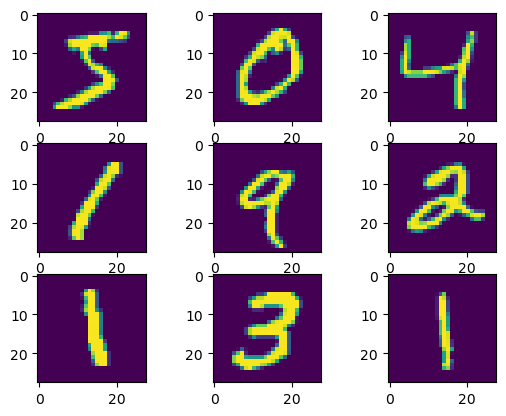

In [100]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_norm[i])

## Building Model

In [101]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu", name="HiddenLayer1"),
    Dense(128, activation="relu", name="HiddenLayer2"),
    Dense(128, activation="relu", name="HiddenLayer3"),
    Dense(10, activation="softmax", name="OutputLayer")
])

In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               100480    
                                                                 
 HiddenLayer2 (Dense)        (None, 128)               16512     
                                                                 
 HiddenLayer3 (Dense)        (None, 128)               16512     
                                                                 
 OutputLayer (Dense)         (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
model.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

## Train Model

In [104]:
model.fit(X_norm, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2273 - accuracy: 0.9314
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0999 - accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0711 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0559 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0452 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0375 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0280 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

## Model Prediction on Train DataSet

In [105]:
prediction = model.predict(X_norm)

1875/1875 [==============================] - 6s 3ms/step


In [106]:
y_hat = [np.argmax(i) for i in prediction]

In [107]:
y_hat[:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

In [108]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Measuring Performance on Test DataSet

In [109]:
from sklearn.metrics import accuracy_score, r2_score, f1_score, confusion_matrix
import seaborn as sns

In [112]:
prediction = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [113]:
y_hat = [np.argmax(i) for i in prediction]
y_hat[:10], Y_test[:10]

([7, 2, 1, 0, 4, 1, 4, 9, 5, 9],
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [114]:
print(f"Accuracy Score = {accuracy_score(Y_test, y_hat)}")
print(f"R2 Score = {r2_score(Y_test, y_hat)}")

Accuracy Score = 0.9801
R2 Score = 0.9565424611567


In [115]:
cm = confusion_matrix(Y_test, y_hat)
cm

array([[ 966,    1,    1,    1,    0,    0,    6,    1,    0,    4],
       [   0, 1121,    3,    1,    0,    2,    2,    1,    4,    1],
       [   3,    1, 1017,    1,    1,    0,    2,    2,    5,    0],
       [   0,    0,    4,  976,    1,   14,    0,    4,    4,    7],
       [   0,    0,    7,    0,  957,    0,    3,    2,    0,   13],
       [   1,    0,    2,    2,    1,  876,    3,    0,    3,    4],
       [   2,    2,    0,    1,    4,    3,  945,    0,    1,    0],
       [   0,    2,    8,    1,    1,    0,    0, 1003,    2,   11],
       [   0,    1,    4,    4,    0,    4,    1,    3,  951,    6],
       [   1,    1,    2,    1,    8,    2,    0,    5,    0,  989]],
      dtype=int64)

<Axes: >

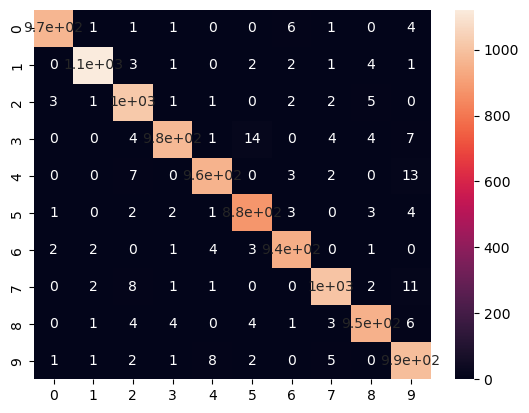

In [116]:
sns.heatmap(cm, annot=True)

## Save model

In [117]:
model.save('my_model.keras')
print("Done")

Done


## Load Model

In [118]:
from tensorflow.keras.models import load_model

In [119]:
new_model = load_model('my_model.keras')

In [120]:
predict = new_model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


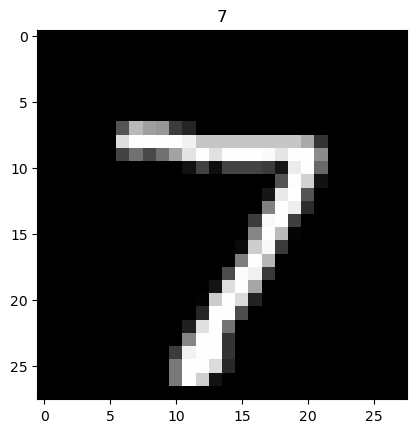

In [121]:
plt.imshow(X_test[0].reshape(28, 28), cmap="gray")
plt.title(f"{np.argmax(predict[0])}")
plt.show()
print ()

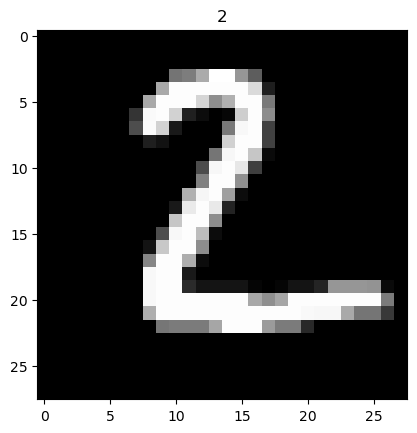

In [122]:
plt.imshow(X_test[1].reshape(28, 28), cmap="gray")
plt.title(f"{np.argmax(predict[1])}")
plt.show()
print ()

# Using HandWriiten Images

In [123]:
import cv2

In [124]:
image = cv2.imread('digits.PNG')
image[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

## image preprocessing

In [125]:
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
grey.shape

(106, 407)

In [126]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
thresh.shape

(106, 407)

In [127]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)




----------------Contoured Image--------------------


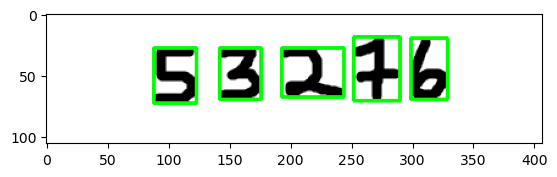

In [128]:
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (7, 7)
    resized_digit = cv2.resize(digit, (18, 18))
    
    # Padding the digit with 1 pixels of black color (zeros) in each side to finally produce the image of (8, 8)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

In [129]:
img = np.array(preprocessed_digits)

In [130]:
img[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  76, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 189,   0,   0,   0,   0,   0,
          0,   0],
       [  

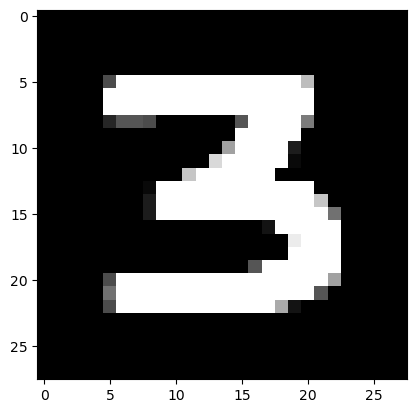

In [131]:
plt.imshow(img[1], cmap="gray")
plt.show()
print ()

In [148]:
img.shape

(5, 28, 28)

## Prediction

In [149]:
predict = new_model.predict(img)

1/1 [==============================] - 0s 38ms/step


In [150]:
predict

array([[3.0488195e-07, 2.1752287e-05, 9.9996424e-01, 1.3092523e-06,
        1.7634136e-08, 1.1188582e-08, 5.3732147e-06, 3.8342591e-06,
        3.0484666e-06, 2.2020912e-09],
       [2.0954301e-20, 1.1774944e-12, 7.0189375e-12, 1.0000000e+00,
        9.5086955e-19, 1.4240424e-09, 3.6833665e-19, 5.1818028e-15,
        1.6415006e-12, 8.5059149e-16],
       [2.3095135e-21, 1.2803306e-18, 3.2638330e-17, 1.0070222e-12,
        3.2865124e-15, 1.0000000e+00, 4.2829043e-12, 1.4497591e-18,
        3.8844963e-10, 5.1093430e-08],
       [3.5279197e-06, 5.7614278e-11, 3.3977654e-04, 1.5489626e-06,
        4.1633110e-02, 1.2421346e-02, 3.5392761e-01, 3.9278809e-11,
        1.1249256e-03, 5.9054816e-01],
       [5.4490770e-22, 1.1957807e-10, 2.0708978e-10, 1.1769746e-10,
        2.3898605e-11, 1.6558860e-17, 5.4197435e-22, 1.0000000e+00,
        8.4648343e-17, 1.8935087e-15]], dtype=float32)

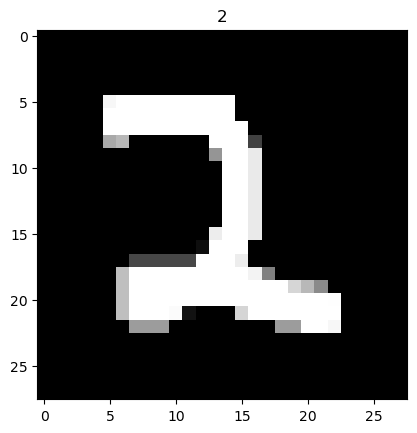

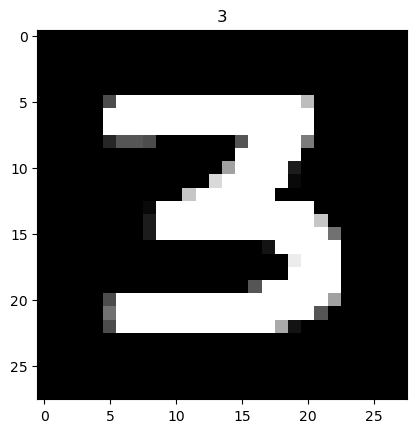

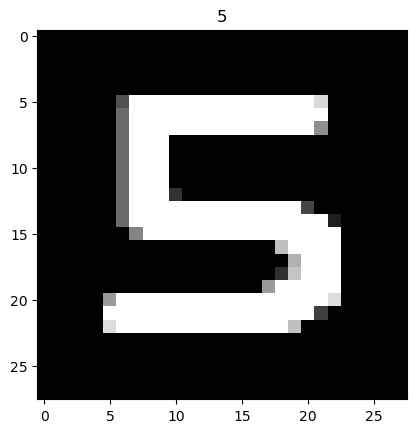

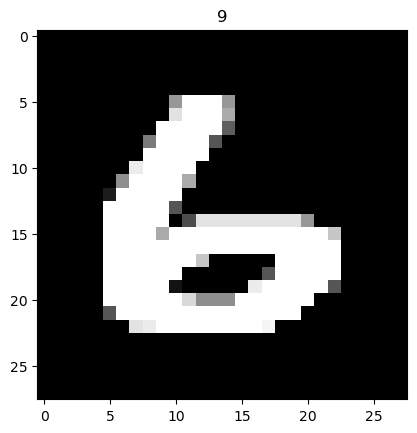

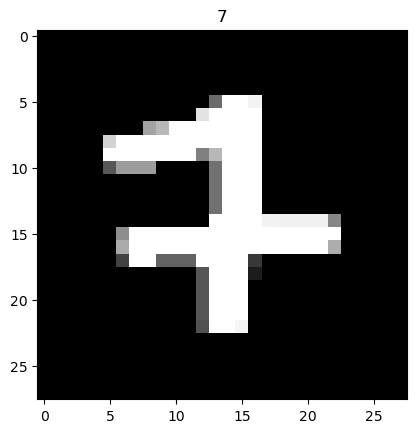

In [151]:
for i in range(len(img)):  
    plt.imshow(img[i], cmap="gray")
    plt.title(f"{np.argmax(predict[i])}")
    plt.show()
    print ()